In [1]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)

1.1.0
1.18.5


In [2]:
from modules.replace_dep import replace_with_dict, remove_college
replace_with_dict("언홍영")

'언론홍보영상학'

In [3]:
remove_college("사회과학대학")

''

In [4]:
df_abstact_wrangle = pd.read_csv("data_wrangled/df_abstract_wrangle.csv", encoding="utf-8")
df_abstact_wrangle.sample(5)

,대학코드,제목,학과,과정,년도,BERT_SCORE,RNN_SCORE,REVIEW_LINK
4175,NL000002,Unforgettable life in Den Haag,도시공학과,학부,2012,1,0.512270,http://oia.yonsei.ac.kr/partner/expReport.asp?...
10812,US000250,Emerald City,심리학과,학부,2007-2008,1,0.523097,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3727,JP000013,교토대학 교환학생을 마치며,경제학과,학부,2015-2016,0,0.632507,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2843,FR000011,내 생활을 완전히 바꾸어놓은 파리에서의 한 학기,신과대학 신학과,학부,2013,1,0.746402,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2552,FI000014,경험보고서,경영학전공,학부,2003,1,0.755571,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [5]:
departments = list(df_abstact_wrangle["학과"].unique())
print(len(departments), departments[:10])

1234 ['사회복지학과/언론홍보영상학부', '건축학과', '경영학과', '경제', '언론홍보영상학', '중어중문학과', '정치외교학과', '행정학과', '경제학부', '언론홍보영상학부']


In [6]:
df_abstact_wrangle["학과"] = df_abstact_wrangle["학과"].fillna(" ")
df_abstact_wrangle["학과"].isnull().values.any()

False

In [7]:
# 이중전공 두 개로 쪼개기
import re
import numpy as np
from itertools import chain

# return list from series of comma-separated strings
def split_double_majors(str):
    return re.split(',|/', str)

def chainer(series):
    # print(series)
    return list(chain.from_iterable(series.apply(split_double_majors)))

# calculate lengths of splits
# lens = df_abstact_wrangle['학과'].str.split('/').map(len)
lens = df_abstact_wrangle['학과'].apply(split_double_majors).map(len)
lens

0        2
1        1
2        1
3        1
4        1
        ..
11178    1
11179    2
11180    1
11181    1
11182    1
Name: 학과, Length: 11183, dtype: int64

In [8]:
# create new dataframe, repeating or chaining as appropriate
res = pd.DataFrame({'대학코드': np.repeat(df_abstact_wrangle['대학코드'], lens),
                    '제목': np.repeat(df_abstact_wrangle['제목'], lens),
                    '학과': chainer(df_abstact_wrangle['학과']),
                    '과정': np.repeat(df_abstact_wrangle['과정'], lens),
                    '년도': np.repeat(df_abstact_wrangle['년도'], lens),
                    'BERT_SCORE': np.repeat(df_abstact_wrangle['BERT_SCORE'], lens),
                    'RNN_SCORE': np.repeat(df_abstact_wrangle['RNN_SCORE'], lens),
                    'REVIEW_LINK': np.repeat(df_abstact_wrangle['REVIEW_LINK'], lens),})
res

,대학코드,제목,학과,과정,년도,BERT_SCORE,RNN_SCORE,REVIEW_LINK
0,730,리투아니아에서 행복했던 4개월,사회복지학과,학부,2019,1,0.752021,http://oia.yonsei.ac.kr/partner/expReport.asp?...
0,730,리투아니아에서 행복했던 4개월,언론홍보영상학부,학부,2019,1,0.752021,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000004,아르헨티나 교환학생(어학연수프로그램),건축학과,학부,2013-1,0,0.399670,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AT000001,쿠프슈타인에서 노후 50년 땡겨쓰기,경영학과,학부,2017-2018,0,0.416185,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AT000001,평화로운 쿠프에서의 한 학기,경제,학부,2017ㅡ2018,1,0.816743,http://oia.yonsei.ac.kr/partner/expReport.asp?...
...,...,...,...,...,...,...,...,...
11179,US000301,Spring 2019 at Case,경영학과,학부,2019,1,0.512358,http://oia.yonsei.ac.kr/partner/expReport.asp?...
11179,US000301,Spring 2019 at Case,심리학과,학부,2019,1,0.512358,http://oia.yonsei.ac.kr/partner/expReport.asp?...
11180,US000301,"Case, 나의 대학생활 최고의 순간",창의기술경영학과,학부,2017-2018,1,0.699721,http://oia.yonsei.ac.kr/partner/expReport.asp?...
11181,US000303,미국 Liberal Arts College에서의 교환생활,언더우드학부 경제학과,학부,2020,0,0.686848,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [9]:
df_department = res[["대학코드", "학과", "REVIEW_LINK"]]
df_department.head()

,대학코드,학과,REVIEW_LINK
0,730,사회복지학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
0,730,언론홍보영상학부,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000004,건축학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AT000001,경영학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AT000001,경제,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [10]:
# apply preprocessing module
df_department["학과"] = df_department["학과"].apply(lambda x: replace_with_dict(x))
df_department["학과"] = df_department["학과"].apply(lambda x: remove_college(x))
df_department.head()

,대학코드,학과,REVIEW_LINK
0,730,사회복지학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
0,730,언론홍보영상학,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000004,건축공학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AT000001,경영학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AT000001,경제학과,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [11]:
from collections import Counter
print(Counter(df_department["학과"]))
# print(Counter(temp))

Counter({'경영학과': 2327, '영어영문학과': 958, '경제학과': 874, '정치외교학과': 605, '심리학과': 375, '신문방송학과': 354, '행정학과': 245, '사회학과': 234, '중어중문학과': 208, '응용통계학과': 206, '교육학과': 202, '전기전자공학과': 202, '국어국문학과': 171, '언론홍보영상학': 165, '불어불문학과': 165, '사학과': 155, '의류환경학과': 151, '상경계열': 138, '건축공학과': 132, '독어독문학과': 130, '노어노문학과': 120, '인문학부': 109, '기계공학과': 99, '사회복지학과': 90, '문화인류학과': 77, '법학과': 76, '문헌정보학과': 69, '정보산업공학과': 69, '화공생명공학과': 60, '생명공학과': 60, '철학과': 59, 'UIC': 59, '신학과': 57, '생활디자인학과': 56, '아동가족학과': 55, '수학과': 54, '식품영양학과': 53, '화학과': 53, '신소재공학과': 50, '컴퓨터과학과': 49, '도시공학과': 47, '의예과': 45, '실내건축학과': 44, '의공학부': 44, '주거환경학과': 43, '동아시아국제학부': 39, '생활디자인': 38, '생화학과': 38, '': 35, '스포츠레저학과': 35, '토목환경공학과': 35, '국제학과': 35, '화학공학과': 33, '언더우드학': 33, '국제학대학원': 28, '철학': 26, '유럽어문학부': 24, '물리학과': 24, '국제관계학과': 24, '생명공학전공': 21, '기계전자공학부': 21, 'Underwood International College': 21, '천문우주학과': 20, '체육교육학과': 20, '주거환경전공': 19, '시스템생물학과': 19, '신문방송': 19, '문화디자인경영': 18, '언더우드학부 경제학과': 18, '대기과학과': 17, '산업공학과': 17, '

In [12]:
from math import nan

departments = df_department["학과"].unique()
# departments = temp.unique()

korean_deparments = []
english_departments = []
for department in departments:
    if type(department) == float:
        pass
    elif not re.search(r'[a-zA-Z]', department):
        korean_deparments.append(department)
    else:
        english_departments.append(department)


In [13]:
# print(len(korean_deparments), korean_deparments)
print(len(korean_deparments),sorted(korean_deparments))

512 ['', '-정치외교학과', '..', '1020011', '2012121230', '52-134', '간호학과', '감호학과', '건설환경공학과', '건설환경공학부', '건축공학', '건축공학과', '경영', '경영학', '경영학과', '경제', '경제학', '경제학 전공', '경제학과', '경제학부', '계량위험관리', '계량위험관리학과', '과학기술정책', '교', '교육대학원', '교육대학원 영어교육학과', '교육학과', '교회음악과', '구세현', '국어국문학과', '국제', '국제개발협력', '국제경영', '국제관계', '국제관계학', '국제관계학과', '국제관계학전공', '국제관계확과', '국제통상', '국제통상전공', '국제통상학', '국제통상학과', '국제학', '국제학 대학원', '국제학 대학원 국제경영', '국제학과', '국제학대학원', '국제학대학원 국제경영', '국제학대학원 국제통상', '국제학대학원 국제통상전공', '국제학대학원 국제협력', '국제학대학원 국제협력전공', '국제학대학원 지역학전공', '국제학부', '국제학부 경제학과', '국제학부 국제학', '국제학부 국제학과', '국제학부 비교문학과문화', '국제학부 비교문학과문화과', '국제학부 정치외교학', '국제학부 정치외교학과', '국제학부_정치외교학과', '국제협력', '글로벌 엘리트', '글로벌엘리트 학부', '글로벌엘리트학부', '글로벌인새대학', '글로벌인재대학', '글로벌인재학과', '글로벌인재학부', '글로벌인재학부 한국문화·통상전공', '글로벌인재학부 한국문화과', '글로벌인재학부 한국문화전공', '글로벌인재학부 한국문화통상전공 한국언어문화교육전공', '글로벌인제학부', '글로벌행정', '글로벌행정학과', '금속시스템', '금속시스템공학', '금속시스템공학과', '금속시스템공학전공', '기계공학과', '기계공학부', '기계전자공학부', '기계전자공학부 전기전자전공', '기악', '기악과', '나노과학공학', '나노과학공학과', '노어노문학과', '대기과학',

In [14]:
print(len(english_departments), english_departments)

179 ['EIC', 'Underwood International College', 'UD 국제학과', 'GSIS', 'EESE', 'Information and Interaction Design', 'Economics (UIC)', 'UIC - PSIR', 'UIC 아시아학과', 'UIC 문학과 문화학', 'UIC', 'TAD (IID & CDM)', 'International Studies', 'UIC경제학과', 'International Trade', 'Finance and Management', '언더우드학과 ud', 'Psychology', 'UIC(Quantitativive Risk Management)', 'UD ECON', '언더우드학부- 정치외교학과 (PSIR)', '국제학부 HASS SDC(지속개발협력)', '언더우드학부-국제학 (UD-IS)', 'UIC 생명과학공학', '국제학부 PSIR', 'Underwood Division', 'PSIR', '동아시아국제학부(EIC)', 'ASD', 'International studies', 'UIC 경제', 'Energy& Environmental Science Engineering', 'UIC ECON', '경영전문대학교 GMBA', 'Economics', '테크노아트학부 CDM', 'UIC국제학과', 'UIC 경제학과', 'UIC 비교문학', 'Social Sciences', 'philosophie', '에너지환경융합(EESE)', 'UIC 생명과학공학과', 'UIC 테크노아트학부', 'Quantitative Risk Management', 'Comparative Literature & Culture', 'UIC PSIR', 'UIC 문화디자인경영', '국제학과 (International Studies)', '계량위험관리(QRM)', 'Underwood International College - Economics', 'UIC - Economics', 'UIC IS', 'UIC Political S

In [15]:
univ_code = "JP000023"
one_univ_departments = df_department.loc[df_department["대학코드"]==univ_code]["학과"]
one_univ_departments

3885         신문방송학과
3886         문헌정보학과
3887           경제학과
3888         영어영문학과
3889     정경대학 국제관계학
3890         역사문화학과
3891           교육학과
3892         국어국문학과
3893         생활디자인과
3894         신문방송학과
3895         사회체육학과
3896         영어영문학과
3897        기계전자공학부
3898         신문방송학과
3899         보건행정학과
3900    사회과학계열 행정학과
3901         영어영문학과
3902          도시공학과
3903         정치외교학과
3904           상경계열
3905        생활디자인전공
3906         신문방송학과
Name: 학과, dtype: object

In [16]:
from collections import Counter, OrderedDict

dict_departments = Counter(one_univ_departments)
ordered_dict_departments= OrderedDict(dict_departments.most_common())
departments = list(ordered_dict_departments.keys())
number_of_students = list(ordered_dict_departments.values())
print(departments, number_of_students)

['신문방송학과', '영어영문학과', '문헌정보학과', '경제학과', '정경대학 국제관계학', '역사문화학과', '교육학과', '국어국문학과', '생활디자인과', '사회체육학과', '기계전자공학부', '보건행정학과', '사회과학계열 행정학과', '도시공학과', '정치외교학과', '상경계열', '생활디자인전공'] [4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
from collections import Counter, OrderedDict

univ_code = "DE000003"
one_univ_departments = df_department.loc[df_department["대학코드"]==univ_code]["학과"]
one_univ_departments

dict_departments = Counter(one_univ_departments)
ordered_dict_departments= OrderedDict(dict_departments.most_common())
departments = list(ordered_dict_departments.keys())
number_of_students = list(ordered_dict_departments.values())
print(departments, number_of_students)

['독어독문학과', '영어영문학과', '경영학과', '정치외교학과', '생활디자인학과', '사학과', '문화인류학과', 'philosophie', '사회복지학과', '교육학과', '심리학과', '인문학부', '유럽어문학부', '상경계열'] [32, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


NanumGothic


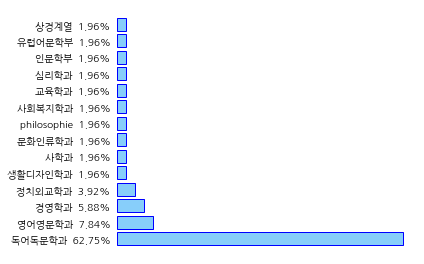

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 폰트 설정
fontpath = './font/NanumGothic.ttf'
from matplotlib import font_manager, rc
font_manager._rebuild()
font_name = font_manager.FontProperties(fname=fontpath).get_name()
print(font_name)
rc('font', family=font_name)


fig, ax = plt.subplots()

total = sum(number_of_students)

np_number = np.array(number_of_students)

percent = np_number/total*100

new_labels = [i+'  {:.2f}%'.format(j) for i, j in zip(departments, percent)]

plt.barh(departments, np_number, color='lightskyblue', edgecolor='blue')
plt.yticks(range(len(departments)), new_labels)
plt.tight_layout()

for spine in ax.spines.values():
    spine.set_visible(False)

ax.axes.get_xaxis().set_visible(False)
ax.tick_params(axis="y", left=False)
plt.show()

# Top 3해서 pie chart로 보여주기 vs 기타 과에 무슨 과가 있는지 써주는 정도
# Top 5 subplot으로 보여주기
# %가 아니라 몇 명 다녀갔는지 보여주기


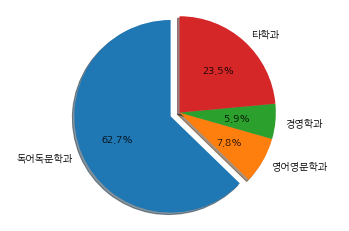

In [19]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = departments[:3] + ["타학과"]
sizes = number_of_students[:3] + [sum(number_of_students[3:])]
explode = (0.1, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


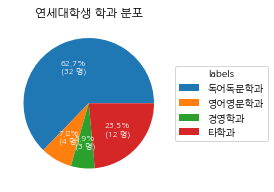

In [31]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

sizes = number_of_students[:3] + [sum(number_of_students[3:])]
labels = departments[:3] + ["타학과"]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} 명)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(sizes, autopct=lambda pct: func(pct, sizes),
                                  textprops=dict(color="w"))

ax.legend(wedges, labels,
          title="labels",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("연세대학생 학과 분포")

plt.show()


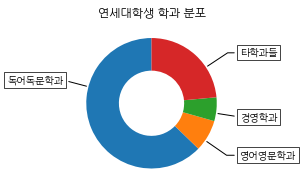

In [60]:
fig, ax = plt.subplots(figsize=(4, 3), subplot_kw=dict(aspect="equal"))

sizes = number_of_students[:3] + [sum(number_of_students[3:])]
labels = departments[:3] + ["타학과들"]

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=90)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/3. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("연세대학생 학과 분포")

plt.show()

In [20]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Nanum' in i.name:
        print(i.name, i.fname)

# font_manager._rebuild()

Nanum Brush Script /System/Library/AssetsV2/com_apple_MobileAsset_Font6/3b0bb049516d6dd825e1cd8731587ca7415517ff.asset/AssetData/NanumScript.ttc
NanumBarunGothic /Users/noopy/Library/Fonts/NanumBarunGothic.ttf
Nanum Myeongjo /System/Library/AssetsV2/com_apple_MobileAsset_Font6/5c10807185ddbca859bc0b3ecefe55ebb1985aa9.asset/AssetData/NanumMyeongjo.ttc
NanumGothic /Users/noopy/Library/Fonts/NanumGothic.ttf
Nanum Gothic /System/Library/AssetsV2/com_apple_MobileAsset_Font6/ee9e9584cd1a5f676e03a9efcc80783bc7e12e2c.asset/AssetData/NanumGothic.ttc
